<a href="https://colab.research.google.com/github/ssingh1187/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [3]:
# Since we want to predict "price", that is our target
Y = df['price']
X = df.drop('price', axis = 1)

print(Y.shape)
print(X.shape)

(8495,)
(8495, 8)


## 1.2 Split the data into test and train datasets using train_test_split

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.5,random_state=42)

print(X.shape)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8495, 8)
(4247, 8)
(4248, 8)
(4247,)
(4248,)


## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [5]:
# Multiple regression model to find out Slope coefficient and Intercept value
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [6]:
print('Slope Coefficient: ', model.coef_)
print('\nIntercept Value: ', model.intercept_)

Slope Coefficient:  [  -35.22479484 -1672.11973555   -37.12848399   269.61582544
 -1284.74375962  4649.46225339  1098.2829573   7886.89079148]

Intercept Value:  -2184591.0115608736


## 1.5 Use the test data to make predictions

In [7]:
y_test_predict = model.predict(X_test)

print ('Prediction:\n ', y_test_predict)

Prediction:
  [18501.5313198   5449.53615628 25121.57031334 ... 20204.90435025
 21612.72025077  8218.38709262]


## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [8]:
RMSE = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE is:', RMSE)
print('\nR^2 is: ', r2)

RMSE is: 22470.10563446866

R^2 is:  0.2694482951962195


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

Correlation coeffcient corresponding to 'year' tells us the effect of 'year' on the price of the model.
For our convenience, let's say that difference between `current date and year = age`.

1. If coefficient is **negative** and has a :
  * **High Value**:  price will go up if `age` is **more**.
  * **Low Value**: price will go up if `age` is **less**.
2. If coefficient is **positive** and has a :
  * **High Value**:  price will go up if `age` is **less**.
  * **Low Value**: price will go up if `age` is **more**.
  

## 1.8 How should we interpret the Root-Mean-Square Error?

RMSE is a way to find the accuracy of our predictive model to actual results. The smaller the RMSE, better the prediction of the model.
In this example the RMSE is 22470.1056 and quite large. Hence, the prediction of the model is not very accurate.


## 1.9 How should we interpret the $R^2$?

In simple terms, $R^2$ is percentage of `Y` explained in `X`. 𝑅2  is a statistical measure of how close the data are fitted to our regression line and ranges from (0,1). Higher the value of $R^2$, better the goodness of fit of the model.

In this example, $R^2$ is `0.26` and is quite small. Hence, the model is not a very good fit.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [9]:
df['ln_price'] = np.log(df['price'])
df['ln_price'].shape

(8495,)

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

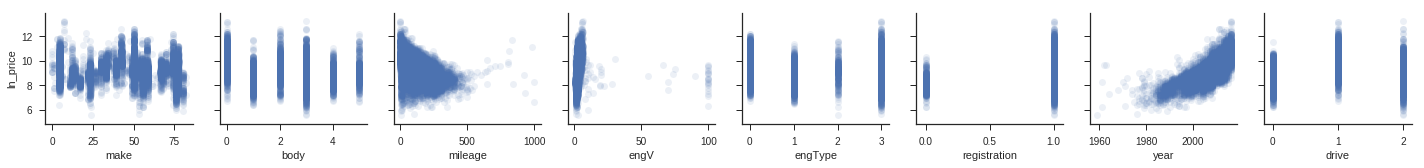

In [10]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including log price
x_columns = df.columns.drop(['price','ln_price'])

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=x_columns, plot_kws={'alpha': 0.1, 'linewidth':0});

From the above graphs,  `year` is the only feature that has a slight curve. 

## 2.3 If appropriate, create any polynomial features. 

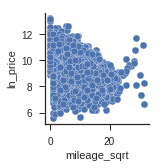

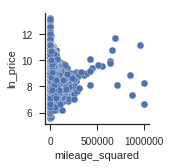

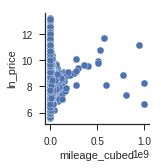

In [12]:
# Let's play with mileage first

df['mileage_sqrt'] = np.sqrt(df.mileage)
df['mileage_squared'] = df['mileage']**2
df['mileage_cubed'] = df['mileage']**3

# # Lets plot these features on scatter plots to eye-ball their relation with ln_price

sns.pairplot(data=df, y_vars=['ln_price'], x_vars=['mileage_sqrt']);
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=['mileage_squared']);
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=['mileage_cubed']);

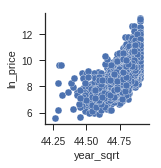

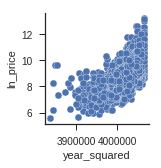

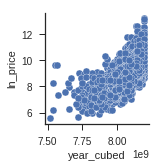

In [15]:
# Following the same process with year

df['year_sqrt'] = np.sqrt(df.year)
df['year_squared'] = df['year']**2
df['year_cubed'] = df['year']**3

sns.pairplot(data=df, y_vars=['ln_price'], x_vars=['year_sqrt']);
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=['year_squared']);
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=['year_cubed']);

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [21]:
# Separating dependent and independent variables
y = df.loc[:, ['ln_price']].values
X = df.drop(columns =['ln_price','price']).values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print(df.columns, '\n\n')

print("Coefficients: \n", model.coef_)
print("\n Intercept: \n", model.intercept_)

print('\nRMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))


Index(['make', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'ln_price', 'mileage_sqrt', 'mileage_squared',
       'mileage_cubed', 'year_sqrt', 'year_squared', 'year_cubed'],
      dtype='object') 


Coefficients: 
 [[-1.59611853e-03 -8.77421701e-02  5.08456650e-03  9.32573806e-03
  -4.16340130e-02  7.03866104e-01  3.00792939e+01  3.75762411e-01
  -6.29999132e-02 -3.78310482e-06  1.74601503e-10  6.31766691e-01
  -1.64846376e-02  2.99567902e-06]]

Intercept: 
 [-18205.78354395]

RMSE is 0.5507864285982421
R^2 is 0.6777694748414065


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

The coefficient for year is 3.00792939e+01and is positive. Therefore, as the car gets older, price decreases.

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Gradient Descent minimizes the cost function. In other words, it seeks minimum residuals of a function or `lowest sum of squared errors.`

## 3.2 What is the "Learning Rate" and what is its function?

Steps needed by Gradient Descent to minimize cost function is known as `Learning Rate`. 
  
  
  If the `learning rate` is too small, the function may require many updates to reach the minimum point. 
  If the `learning rate` is too high,  it can cause drastic updates and in turn can lead to divergent behaviors.
  

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [23]:
# For Log-Linear regression

y = df['ln_price']
X = df[['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'year', 'drive']]

# To add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     2040.
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:28:03   Log-Likelihood:                -7167.0
No. Observations:                8495   AIC:                         1.435e+04
Df Residuals:                    8486   BIC:                         1.442e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -181.8341      2.144    -84.810   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(X.columns, '\n\n')

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

Index(['const', 'make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive'],
      dtype='object') 


[123262.01363199769, 1.0591492515492282, 1.1583256001339475, 1.5496097971160896, 1.0093210319338703, 1.1411828507373443, 1.0918920928785216, 1.4585277185506464, 1.1310208897031016]


Except const, all other VIFs are less than 10.

In [25]:
no_const = X.drop('const', axis=1)
no_const.corr()

,make,body,mileage,engV,engType,registration,year,drive
make,1.000000,0.026127,-0.035097,-0.021246,-0.011880,0.104557,-0.013833,-0.196444
body,0.026127,1.000000,0.287060,-0.025320,-0.184007,-0.082643,-0.154554,-0.162235
mileage,-0.035097,0.287060,1.000000,0.042081,-0.229644,-0.229354,-0.503135,0.067962
engV,-0.021246,-0.025320,0.042081,1.000000,-0.004896,-0.015274,-0.041076,0.084756
engType,-0.011880,-0.184007,-0.229644,-0.004896,1.000000,0.152988,-0.040471,-0.044859
registration,0.104557,-0.082643,-0.229354,-0.015274,0.152988,1.000000,0.185104,-0.055793
year,-0.013833,-0.154554,-0.503135,-0.041076,-0.040471,0.185104,1.000000,-0.169709
drive,-0.196444,-0.162235,0.067962,0.084756,-0.044859,-0.055793,-0.169709,1.000000


There are no multicollinearity among variables.